In [97]:
import pandas as pd #데이터 프레임 호출
import matplotlib.pyplot as plt # 시각화 
import seaborn as sns  #시각화
import numpy as np
from matplotlib import font_manager,rc
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

In [99]:
data = df.copy()

In [100]:
data = data.drop(columns = [ 'DI'])

|제목|내용|
|------|----|
|Symtom|상태가 호전되었는지 악화되었는지 설명하는 속성|
|CM|약을 안먹은 횟수|
|VT|병원에 방문한 횟수|
|HB|반신욕 횟수|
|WT|운동 횟수|
|DS|수면 횟수|
|ST|스트레스 여부 0-없음 1-있음|
|DD|음주 횟수|
|EF|밀가루 음식 섭취 횟수|
|DI|질병|

In [101]:
def rounds(x):
    try: 
        x = str(x)
        x = x.split('~')
        x = (int(x[0]) + int(x[-1]))/2
        x = round(x)
        x = int(x)
    except:
        pass
    return x

In [102]:
data['CM'] = data['CM'].apply(rounds)
data['VT'] = data['VT'].apply(rounds)
data['HB'] = data['HB'].apply(rounds)
data['WT'] = data['WT'].apply(rounds)
data['DS'] = data['DS'].apply(rounds)
data['ST'] = data['ST'].apply(rounds)
data['DD'] = data['DD'].apply(rounds)
data['EF'] = data['EF'].apply(rounds)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Symtom  263 non-null    int64
 1   CM      263 non-null    int64
 2   VT      263 non-null    int64
 3   HB      263 non-null    int64
 4   WT      263 non-null    int64
 5   DS      263 non-null    int64
 6   ST      263 non-null    int64
 7   DD      263 non-null    int64
 8   EF      263 non-null    int64
dtypes: int64(9)
memory usage: 18.6 KB


In [104]:
print(data.shape) #데이터 갯수 확인

(263, 9)


In [105]:
data.head()

,Symtom,CM,VT,HB,WT,DS,ST,DD,EF
0,4,0,8,16,20,30,1,0,0
1,5,0,8,4,0,30,1,4,10
2,4,4,4,30,10,0,0,0,22
3,5,0,7,0,8,0,0,2,0
4,4,0,4,25,15,0,0,0,10


In [106]:
# 상태값을 좋아졌으면 1 나빠졌으면 0으로 치환 1,2,3은 상태가 매우나빠짐,나빠짐,보통을 뜻합니다.
#4,5는 상태가 좋아짐 매우좋아집을 뜻합니다. 그래서 1,2,3을 0으로 4,5를 1로 묶어서 사용했습니다.
data.Symtom = data.Symtom.replace(3,0) # 고민문제
data.Symtom = data.Symtom.replace(2,0)
data.Symtom = data.Symtom.replace(1,0)
data.Symtom = data.Symtom.replace(5,1)
data.Symtom = data.Symtom.replace(4,1)

# data.Symtom = data.Symtom.astype(str)
data.Symtom = data.Symtom.astype('category')

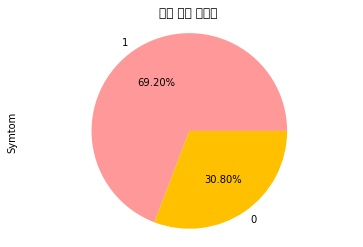

In [107]:
df3 = data.Symtom.value_counts()
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#d39542']
df3.plot.pie(autopct='%.2f%%',colors=colors)
plt.title("상태 변화 분포도")
plt.axis('equal')
plt.show()

In [108]:
data.Symtom.value_counts()

1    182
0     81
Name: Symtom, dtype: int64

In [109]:
from sklearn.linear_model import Lasso,ElasticNet,Ridge,RidgeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,validation_curve,GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
import matplotlib.pyplot as plt
from catboost import* 
from xgboost import XGBClassifier
from lightgbm import*
from sklearn.metrics import accuracy_score,f1_score
#머신러닝 모델 호출

In [110]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [111]:
#데이터셋 분리
from sklearn.model_selection import train_test_split
target = data['Symtom']
dataset = data.drop(columns='Symtom')
X_train, X_test, Y_train, Y_test = train_test_split(dataset, target, test_size=0.3, shuffle=True, random_state=42, stratify= target)

In [112]:
from collections import Counter

In [113]:
smote_sample = SMOTE(sampling_strategy=0.9, random_state=13) 
X_sm, y_sm = smote_sample.fit_resample(X_train, Y_train)
print(Counter(y_sm))

Counter({1: 127, 0: 114})


In [114]:

#에이다 부스터 단독모델
ada= AdaBoostClassifier()
ada.fit(X_sm, y_sm)
pre=ada.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(Y_test, pre)))
f1 = f1_score(Y_test, pre)
print('f1 score :', f1)

Voting 분류기 정확도: 0.6329
f1 score : 0.7128712871287128


In [115]:
#더많은 모델을 호출후 앙상블

lr = LogisticRegression(random_state=217,max_iter=1000)
rfc = RandomForestClassifier(random_state=217,max_depth=10, n_estimators=100, )
dt = DecisionTreeClassifier(random_state=217)
cbc = CatBoostClassifier(verbose = 100,random_state=217)
xgb = XGBClassifier(random_state=217)
lgbm = LGBMClassifier(n_estimators=100,max_features=10,random_state=217)
lda= LinearDiscriminantAnalysis()
ada= AdaBoostClassifier(random_state=217)
xgb = XGBClassifier(random_state=217, n_estimators=100)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)

class_weights = {0: 0.9, 1: 0.1}



vo_clf = VotingClassifier(estimators=[('lr', lr),('rfc', rfc),  ('dt', dt), ('cbc', cbc),('xgb', xgb),\
                                     ('lgbm', lgbm),  ('ada', ada), ('gbc', gbc)], voting='soft')
vo_clf.fit(X_train, Y_train, sample_weight=[class_weights[y] for y in Y_train])


class_weights = {0: 0.9, 1: 0.1}
for clf in vo_clf.estimators_:
    if hasattr(clf, "sample_weight"):
        clf.sample_weight = [class_weights[y] for y in Y_train]
vo_clf.fit(X_sm, y_sm)

# Evaluate the voting classifier on the test data
y_pred = vo_clf.predict(X_test)

# Print the accuracy score
print("Accuracy:", accuracy_score(Y_test, y_pred))

Learning rate set to 0.005
0:	learn: 0.6904536	total: 1.29ms	remaining: 1.28s
100:	learn: 0.5180051	total: 109ms	remaining: 967ms
200:	learn: 0.4370816	total: 232ms	remaining: 922ms
300:	learn: 0.3861394	total: 354ms	remaining: 821ms
400:	learn: 0.3521777	total: 471ms	remaining: 704ms
500:	learn: 0.3242470	total: 593ms	remaining: 591ms
600:	learn: 0.3010580	total: 712ms	remaining: 473ms
700:	learn: 0.2819798	total: 834ms	remaining: 356ms
800:	learn: 0.2641578	total: 966ms	remaining: 240ms
900:	learn: 0.2481453	total: 1.1s	remaining: 121ms
999:	learn: 0.2330222	total: 1.23s	remaining: 0us
[LightGBM] [Warning] Unknown parameter: max_features
Learning rate set to 0.005611
0:	learn: 0.6923642	total: 1.16ms	remaining: 1.16s
100:	learn: 0.5947836	total: 111ms	remaining: 992ms
200:	learn: 0.5180428	total: 231ms	remaining: 920ms
300:	learn: 0.4638140	total: 351ms	remaining: 814ms
400:	learn: 0.4149205	total: 472ms	remaining: 706ms
500:	learn: 0.3799491	total: 592ms	remaining: 589ms
600:	learn:

In [116]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [117]:
#logitic
from sklearn.metrics import f1_score
lr.fit(X_sm, y_sm)
lrpred = lr.predict(X_test)
probs = lr.predict_proba(X_test)[:, 1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, lrpred).ravel()

# Calculate the sensitivity, specificity, and precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = f1_score(Y_test, lrpred)

# Calculate the AUC
auc = roc_auc_score(Y_test, probs)

# Print the metrics
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("AUC:", auc)
print("F1:", f1)
print("\nClassification Report:\n", classification_report(Y_test, lrpred))

Sensitivity: 0.7454545454545455
Specificity: 0.5833333333333334
Precision: 0.803921568627451
AUC: 0.7265151515151514
F1: 0.7735849056603775

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.58      0.54        24
           1       0.80      0.75      0.77        55

    accuracy                           0.70        79
   macro avg       0.65      0.66      0.66        79
weighted avg       0.71      0.70      0.70        79



In [118]:
#ada
from sklearn.metrics import f1_score
ada.fit(X_sm, y_sm)
adapred = ada.predict(X_test)
probs = ada.predict_proba(X_test)[:, 1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, adapred).ravel()

# Calculate the sensitivity, specificity, and precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = f1_score(Y_test, adapred)

# Calculate the AUC
auc = roc_auc_score(Y_test, probs)

# Print the metrics
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("AUC:", auc)
print("F1:", f1)
print("\nClassification Report:\n", classification_report(Y_test, adapred))

Sensitivity: 0.6545454545454545
Specificity: 0.5833333333333334
Precision: 0.782608695652174
AUC: 0.6477272727272727
F1: 0.7128712871287128

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.58      0.49        24
           1       0.78      0.65      0.71        55

    accuracy                           0.63        79
   macro avg       0.60      0.62      0.60        79
weighted avg       0.67      0.63      0.65        79



In [119]:
#rfc
from sklearn.metrics import f1_score
rfc.fit(X_sm, y_sm)
rfcpred = rfc.predict(X_test)
probs = rfc.predict_proba(X_test)[:, 1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, rfcpred).ravel()

# Calculate the sensitivity, specificity, and precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = f1_score(Y_test, rfcpred)

# Calculate the AUC
auc = roc_auc_score(Y_test, probs)

# Print the metrics
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("AUC:", auc)
print("F1:", f1)
print("\nClassification Report:\n", classification_report(Y_test, rfcpred))

Sensitivity: 0.7272727272727273
Specificity: 0.5833333333333334
Precision: 0.8
AUC: 0.7022727272727273
F1: 0.761904761904762

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.58      0.53        24
           1       0.80      0.73      0.76        55

    accuracy                           0.68        79
   macro avg       0.64      0.66      0.65        79
weighted avg       0.70      0.68      0.69        79



In [120]:
#dt
dt.fit(X_sm, y_sm)
dtpred = dt.predict(X_test)
probs = dt.predict_proba(X_test)[:, 1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, dtpred).ravel()

# Calculate the sensitivity, specificity, and precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = f1_score(Y_test, dtpred)

# Calculate the AUC
auc = roc_auc_score(Y_test, probs)

# Print the metrics
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("AUC:", auc)
print("F1:", f1)
print("\nClassification Report:\n", classification_report(Y_test, dtpred))

Sensitivity: 0.6
Specificity: 0.625
Precision: 0.7857142857142857
AUC: 0.6125
F1: 0.6804123711340206

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.62      0.49        24
           1       0.79      0.60      0.68        55

    accuracy                           0.61        79
   macro avg       0.60      0.61      0.59        79
weighted avg       0.67      0.61      0.62        79



In [121]:
#cbc
cbc.fit(X_sm, y_sm)
cbcpred = cbc.predict(X_test)
probs = cbc.predict_proba(X_test)[:, 1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, cbcpred).ravel()

# Calculate the sensitivity, specificity, and precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = f1_score(Y_test, cbcpred)

# Calculate the AUC
auc = roc_auc_score(Y_test, probs)

# Print the metrics
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("AUC:", auc)
print("F1:", f1)
print("\nClassification Report:\n", classification_report(Y_test, cbcpred))

Learning rate set to 0.005611
0:	learn: 0.6923642	total: 1.23ms	remaining: 1.22s
100:	learn: 0.5947836	total: 117ms	remaining: 1.04s
200:	learn: 0.5180428	total: 244ms	remaining: 971ms
300:	learn: 0.4638140	total: 375ms	remaining: 872ms
400:	learn: 0.4149205	total: 499ms	remaining: 745ms
500:	learn: 0.3799491	total: 617ms	remaining: 615ms
600:	learn: 0.3496389	total: 733ms	remaining: 487ms
700:	learn: 0.3211487	total: 850ms	remaining: 363ms
800:	learn: 0.2959896	total: 967ms	remaining: 240ms
900:	learn: 0.2721533	total: 1.09s	remaining: 119ms
999:	learn: 0.2484255	total: 1.2s	remaining: 0us
Sensitivity: 0.8181818181818182
Specificity: 0.4583333333333333
Precision: 0.7758620689655172
AUC: 0.640151515151515
F1: 0.7964601769911505

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.46      0.49        24
           1       0.78      0.82      0.80        55

    accuracy                           0.71        79
   macro avg       

In [122]:
#xgb
xgb.fit(X_sm, y_sm)
xgbpred = xgb.predict(X_test)
probs = xgb.predict_proba(X_test)[:, 1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, xgbpred).ravel()

# Calculate the sensitivity, specificity, and precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = f1_score(Y_test, xgbpred)

# Calculate the AUC
auc = roc_auc_score(Y_test, probs)

# Print the metrics
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("AUC:", auc)
print("F1:", f1)
print("\nClassification Report:\n", classification_report(Y_test, xgbpred))

Sensitivity: 0.6727272727272727
Specificity: 0.5
Precision: 0.7551020408163265
AUC: 0.6348484848484849
F1: 0.7115384615384616

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.50      0.44        24
           1       0.76      0.67      0.71        55

    accuracy                           0.62        79
   macro avg       0.58      0.59      0.58        79
weighted avg       0.65      0.62      0.63        79



In [123]:
#lgbm
lgbm.fit(X_sm, y_sm)
lgbmpred = lgbm.predict(X_test)
probs = lgbm.predict_proba(X_test)[:, 1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, lgbmpred).ravel()

# Calculate the sensitivity, specificity, and precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = f1_score(Y_test, lgbmpred)

# Calculate the AUC
auc = roc_auc_score(Y_test, probs)

# Print the metrics
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("AUC:", auc)
print("F1:", f1)
print("\nClassification Report:\n", classification_report(Y_test, lgbmpred))

[LightGBM] [Warning] Unknown parameter: max_features
Sensitivity: 0.7636363636363637
Specificity: 0.4583333333333333
Precision: 0.7636363636363637
AUC: 0.6200757575757575
F1: 0.7636363636363637

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.46      0.46        24
           1       0.76      0.76      0.76        55

    accuracy                           0.67        79
   macro avg       0.61      0.61      0.61        79
weighted avg       0.67      0.67      0.67        79



In [124]:
#lda
lda.fit(X_sm, y_sm)
ldapred = lda.predict(X_test)
probs = lda.predict_proba(X_test)[:, 1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, ldapred).ravel()

# Calculate the sensitivity, specificity, and precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = f1_score(Y_test, ldapred)

# Calculate the AUC
auc = roc_auc_score(Y_test, probs)

# Print the metrics
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("AUC:", auc)
print("F1:", f1)
print("\nClassification Report:\n", classification_report(Y_test, ldapred))

Sensitivity: 0.7454545454545455
Specificity: 0.5416666666666666
Precision: 0.7884615384615384
AUC: 0.7242424242424242
F1: 0.766355140186916

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.54      0.51        24
           1       0.79      0.75      0.77        55

    accuracy                           0.68        79
   macro avg       0.63      0.64      0.64        79
weighted avg       0.70      0.68      0.69        79



In [125]:
#ada
ada.fit(X_sm, y_sm)
adapred = ada.predict(X_test)
probs = ada.predict_proba(X_test)[:, 1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, adapred).ravel()

# Calculate the sensitivity, specificity, and precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = f1_score(Y_test, adapred)

# Calculate the AUC
auc = roc_auc_score(Y_test, probs)

# Print the metrics
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("AUC:", auc)
print("F1:", f1)
print("\nClassification Report:\n", classification_report(Y_test, adapred))

Sensitivity: 0.6545454545454545
Specificity: 0.5833333333333334
Precision: 0.782608695652174
AUC: 0.6477272727272727
F1: 0.7128712871287128

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.58      0.49        24
           1       0.78      0.65      0.71        55

    accuracy                           0.63        79
   macro avg       0.60      0.62      0.60        79
weighted avg       0.67      0.63      0.65        79



In [126]:
#gbc
gbc.fit(X_sm, y_sm)
gbcpred = gbc.predict(X_test)
probs = gbc.predict_proba(X_test)[:, 1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, gbcpred).ravel()

# Calculate the sensitivity, specificity, and precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = f1_score(Y_test, gbcpred)

# Calculate the AUC
auc = roc_auc_score(Y_test, probs)

# Print the metrics
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("AUC:", auc)
print("F1:", f1)
print("\nClassification Report:\n", classification_report(Y_test, gbcpred))

Sensitivity: 0.7090909090909091
Specificity: 0.5833333333333334
Precision: 0.7959183673469388
AUC: 0.6727272727272727
F1: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.58      0.52        24
           1       0.80      0.71      0.75        55

    accuracy                           0.67        79
   macro avg       0.63      0.65      0.63        79
weighted avg       0.70      0.67      0.68        79



In [127]:
from sklearn.metrics import f1_score

pred6 = vo_clf.predict(X_test)
print('vo_clf6 분류기 정확도: {0:.4f}'.format(accuracy_score(Y_test, pred6)))
f1 = f1_score(Y_test, pred6)
print('f1 score :', f1)

vo_clf6 분류기 정확도: 0.6709
f1 score : 0.7636363636363637


In [128]:
#ada
from sklearn.metrics import f1_score
dt.fit(X_sm, y_sm)
dtpred = dt.predict(X_test)

print('dt 분류기 정확도: {0:.4f}'.format(accuracy_score(Y_test, dtpred)))
f1 = f1_score(Y_test, dtpred)
print('f1 score :', f1)

dt 분류기 정확도: 0.6076
f1 score : 0.6804123711340206


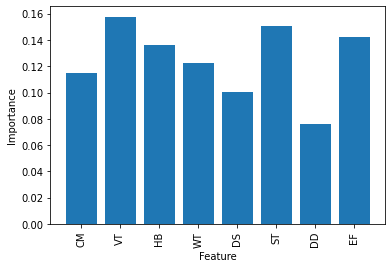

In [129]:
feature_names = X_train.columns
feature_importances = vo_clf.named_estimators_['xgb'].feature_importances_

# Create a bar chart to visualize the feature importances
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

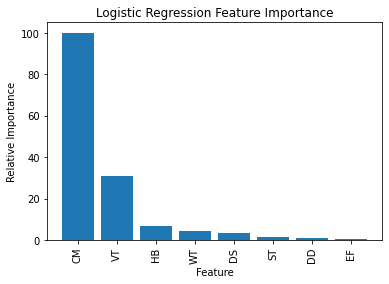

In [130]:
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Sort the feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5

# Create the bar chart
plt.subplot(1, 1, 1)
plt.bar(pos, feature_importance[sorted_idx], align='center')
plt.xticks(pos, feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Relative Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

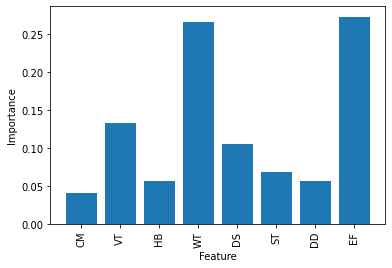

In [131]:
feature_names = X_train.columns
feature_importances = vo_clf.named_estimators_['dt'].feature_importances_

# Create a bar chart to visualize the feature importances
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Symtom  263 non-null    category
 1   CM      263 non-null    int64   
 2   VT      263 non-null    int64   
 3   HB      263 non-null    int64   
 4   WT      263 non-null    int64   
 5   DS      263 non-null    int64   
 6   ST      263 non-null    int64   
 7   DD      263 non-null    int64   
 8   EF      263 non-null    int64   
dtypes: category(1), int64(8)
memory usage: 16.9 KB


In [133]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt, out_file="tree.dot", feature_names=feature_names, class_names= str(data['Symtom']), impurity=True, filled=True)

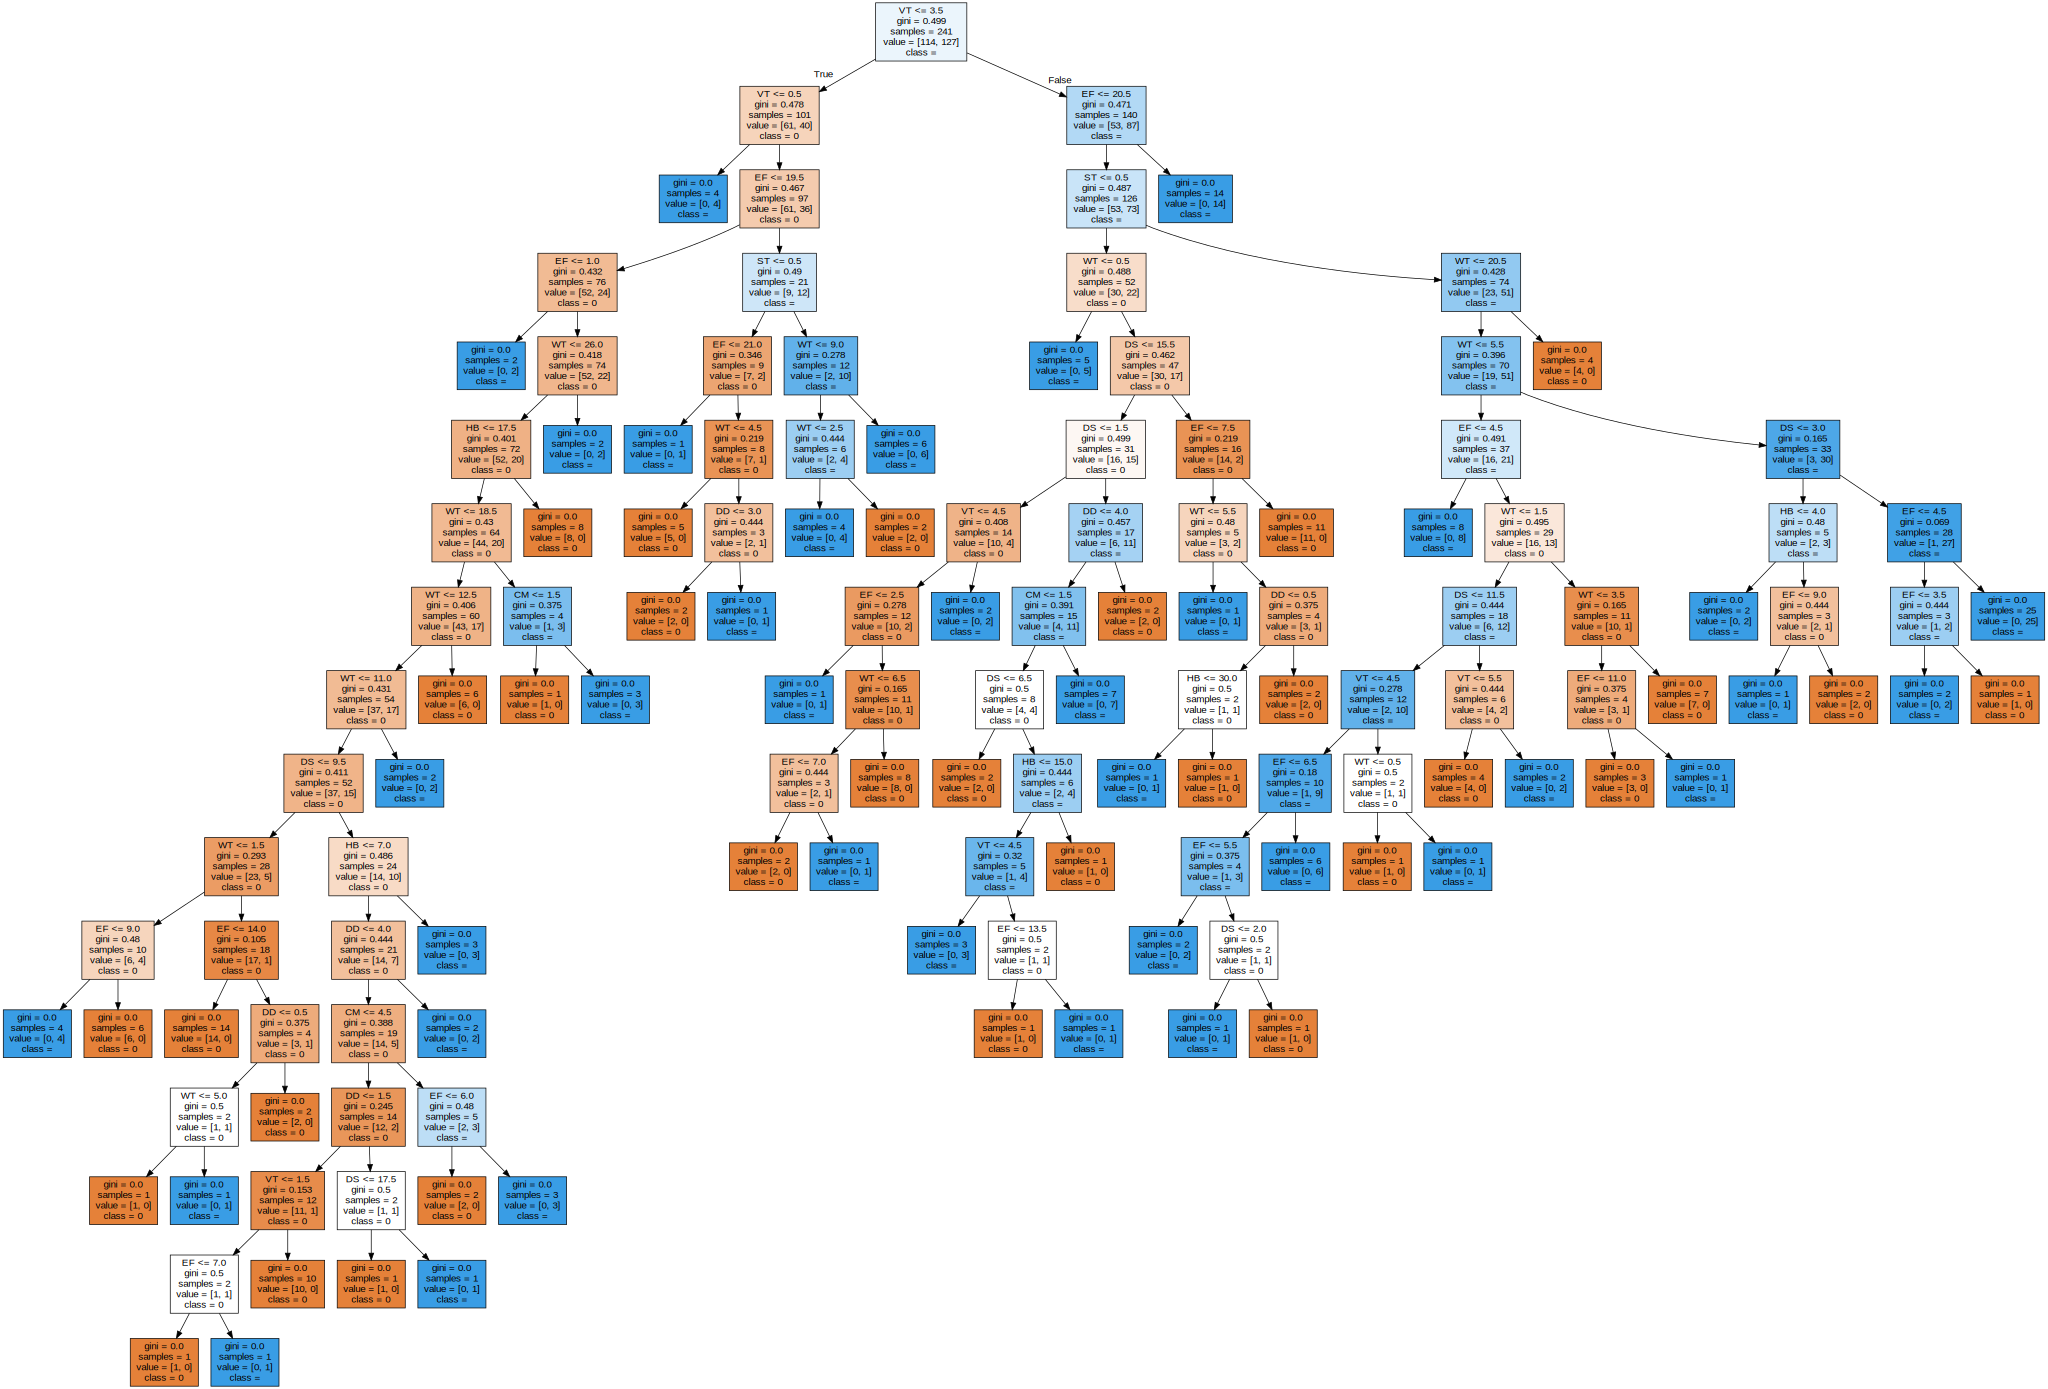

In [134]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [135]:
print(Y_test.to_list())

[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [136]:
predbest = vo_clf.predict(X_test)
print('앙상블 트리 분류기 정확도: {0:.4f}'.format(accuracy_score(Y_test, vo_clf.predict(X_test))))
f1 = f1_score(Y_test,    vo_clf.predict(X_test))
print('f1 score :', f1)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predbest)

앙상블 트리 분류기 정확도: 0.6709
f1 score : 0.7636363636363637


array([[11, 13],
       [13, 42]], dtype=int64)

In [137]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, predbest)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.46      0.46      0.46        24
           1       0.76      0.76      0.76        55

    accuracy                           0.67        79
   macro avg       0.61      0.61      0.61        79
weighted avg       0.67      0.67      0.67        79



In [138]:
predbest = xgb.predict(X_test)
print('xgb 트리 분류기 정확도: {0:.4f}'.format(accuracy_score(Y_test, xgb.predict(X_test))))
f1 = f1_score(Y_test,    xgb.predict(X_test))
print('f1 score :', f1)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predbest)

xgb 트리 분류기 정확도: 0.6203
f1 score : 0.7115384615384616


array([[12, 12],
       [18, 37]], dtype=int64)

In [139]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, predbest)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.40      0.50      0.44        24
           1       0.76      0.67      0.71        55

    accuracy                           0.62        79
   macro avg       0.58      0.59      0.58        79
weighted avg       0.65      0.62      0.63        79



In [140]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

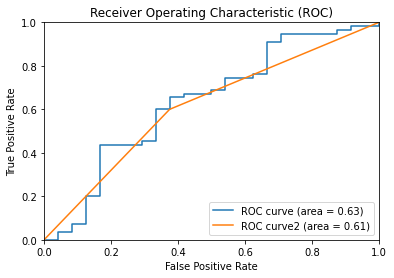

In [141]:
probs = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)


probs2 = dt.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(Y_test, probs2)
# Compute the area under the ROC curve
roc_auc2 = auc(fpr2, tpr2)


# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, label='ROC curve2 (area = %0.2f)' % roc_auc2)
# plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [142]:
data.head()

,Symtom,CM,VT,HB,WT,DS,ST,DD,EF
0,1,0,8,16,20,30,1,0,0
1,1,0,8,4,0,30,1,4,10
2,1,4,4,30,10,0,0,0,22
3,1,0,7,0,8,0,0,2,0
4,1,0,4,25,15,0,0,0,10


In [143]:
import statsmodels.api as sm

model = sm.Logit(data['Symtom'], data[['CM', 'VT', 'HB', 'WT', 'DS', 'ST', 'DD', 'EF']])

# Fit the model
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.547217
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Symtom   No. Observations:                  263
Model:                          Logit   Df Residuals:                      255
Method:                           MLE   Df Model:                            7
Date:                Wed, 10 May 2023   Pseudo R-squ.:                  0.1138
Time:                        02:20:23   Log-Likelihood:                -143.92
converged:                       True   LL-Null:                       -162.40
Covariance Type:            nonrobust   LLR p-value:                 4.779e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CM            -0.0819      0.022     -3.721      0.000      -0.125      -0.039
VT             0.2500      0.